In [1]:
from etools import simulate_ensembles
import json
import random
import os

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os 
ballot_generators = {
    "bt": "Bradley Terry",
    "pl": "Plackett Luce",
    "cs": "Cambridge Sampler",
    #"ac": AlternatingCrossover,
}

def generate_histogram(data, election_type, simulation_type, params):
    unique_values, counts = np.unique(data, return_counts=True)

    plt.bar(unique_values, counts, align='center', alpha=0.7, width=0.8)

    plt.xticks(np.arange(min(unique_values), max(unique_values)+1, 1))  # Set x-axis ticks at distinct whole numbers
    plt.xlabel('Number of Elected POC Candidates')
    plt.ylabel('Frequency')
    plt.title('Histogram for ' + ballot_generators[election_type] + ' model ')
    current_directory = os.getcwd()
    output_path = os.path.join(current_directory, 'Histograms', f'{election_type}_{simulation_type}_histogram.png')
    plt.savefig(output_path)
    plt.text(0.05, 0.95, params, transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
    plt.show()

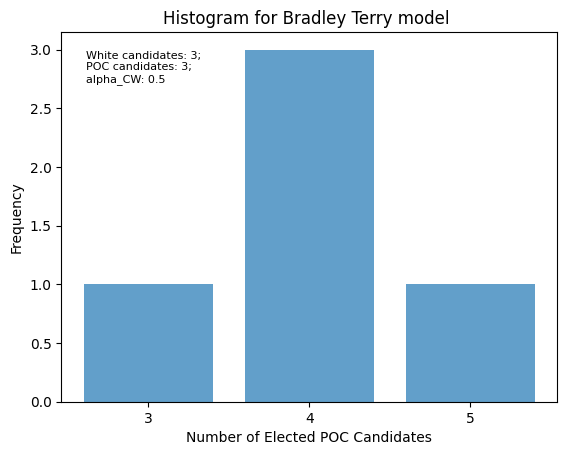

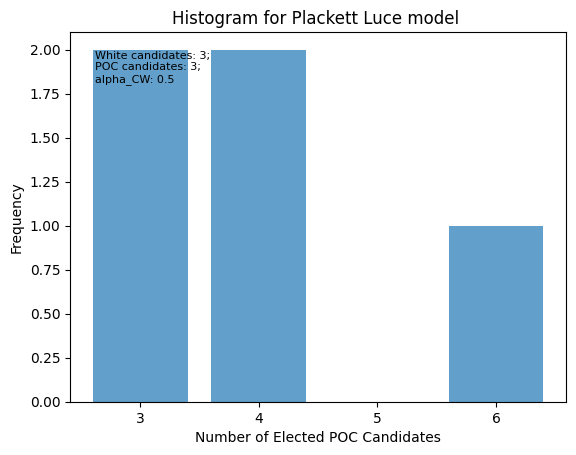

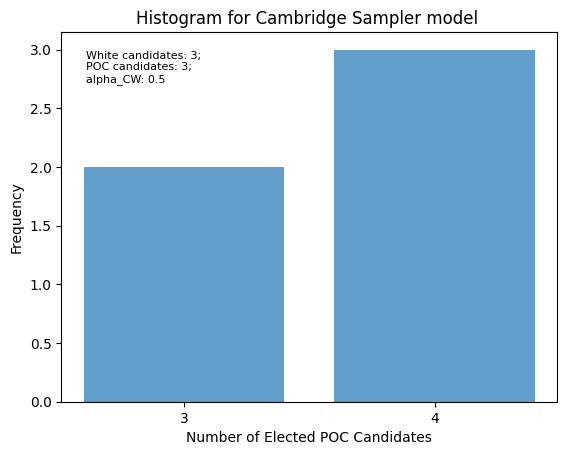

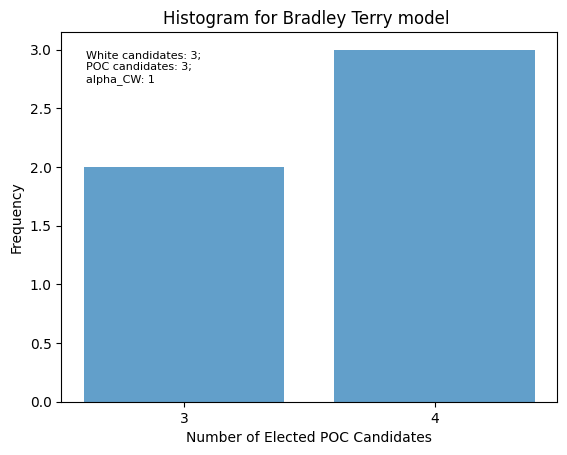

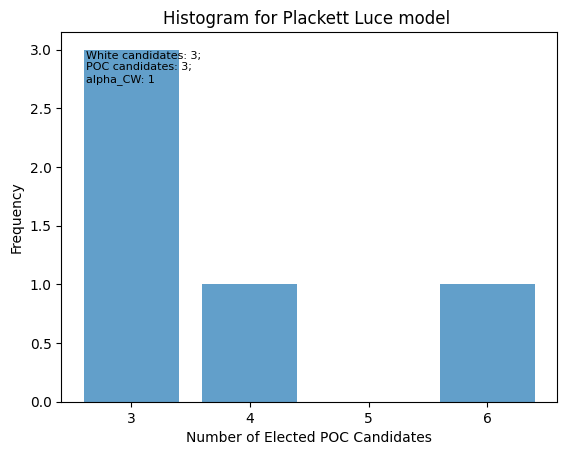

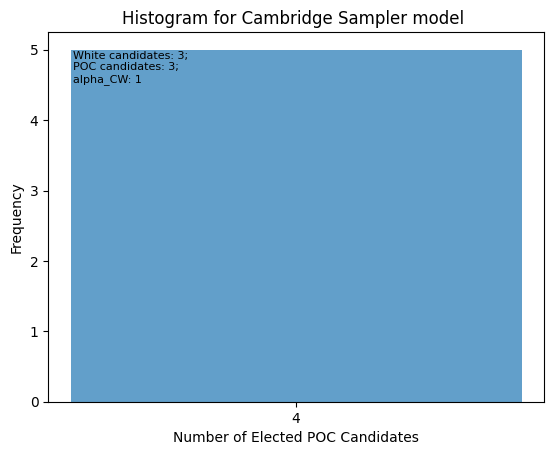

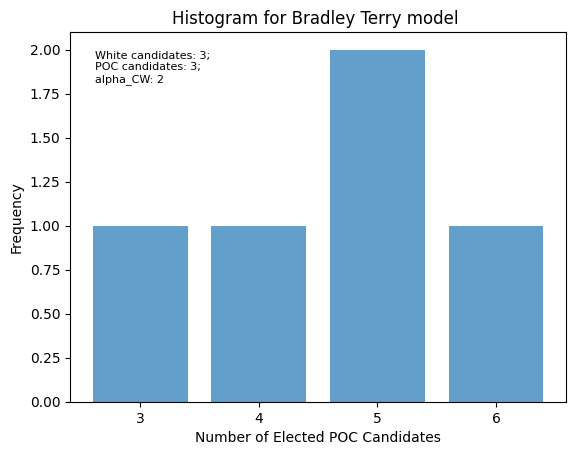

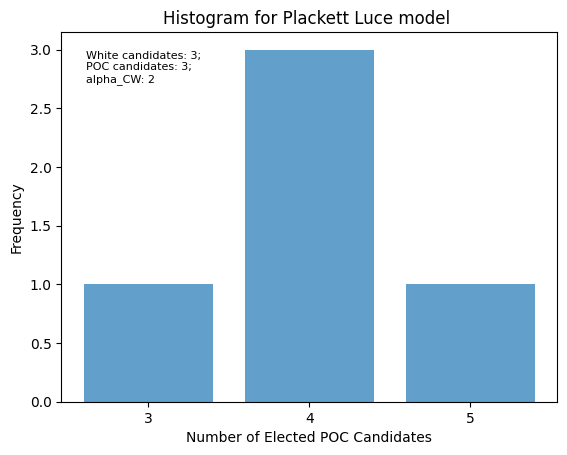

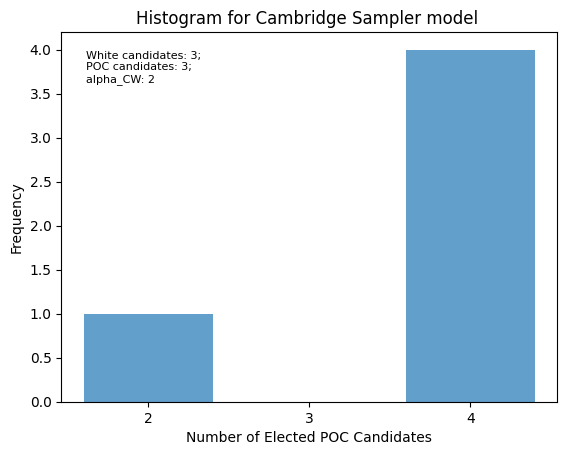

In [31]:
# Parameters to change
alpha_cc = [0.5, 1, 2]
for a in alpha_cc:
    num_w = 3
    num_c = 3
    params = (
            "White candidates: " + str(num_w) + ";\n"
            "POC candidates: " + str(num_c) + ";\n"
            "alpha_CW: " + str(a)
        )
    alphas = {"W": {"C": 1, "W": 1}, "C": {"W": 1, "C": a}}
    basic_start = simulate_ensembles(
        cohesion={"W": 0.7, "C": 0.8},
        num_w=num_w,
        num_c=num_c,
        seats=3,
        num_elections=5,
        alphas=alphas
    )
    simulation_type = str(num_w) + "W_" + str(num_c) + "C_" + str(a) + "CC"
    params = (
        "White candidates: " + str(num_w) + ";\n"
        "POC candidates: " + str(num_c) + ";\n"
        "alpha_CW: " + str(a)
    )
    generate_histogram(basic_start['bt'], 'bt', simulation_type, params)
    generate_histogram(basic_start['pl'], 'pl', simulation_type, params)
    generate_histogram(basic_start['cs'], 'cs', simulation_type, params)

    
